In [2]:
"""Some analysis on integration of bioac with plasma conc. data. Want to know what % of datapoints is changed by plasma conc, and direction of change compared to pchembl 6."""

'Some analysis on integration of bioac with plasma conc. data. Want to know what % of datapoints is changed by plasma conc, and direction of change compared to pchembl 6.'

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
import pickle
from matplotlib_venn import venn2, venn2_circles

In [4]:
basedir = '/scratch/ias41/ae_code'

In [5]:
# Load datafiles which are not restricted to min_n so we can see actual dataset ? 
pchembl6 = pd.read_csv(basedir + '/integration_bioact_plasma_conc/results/pchembl6_tp_cutoff_median.txt', sep='\t')
total_margin = pd.read_csv(basedir + '/integration_bioact_plasma_conc/results/total_median_margin_added_preds_measured_proteins.txt', sep='\t')
unbound_margin = pd.read_csv(basedir + '/integration_bioact_plasma_conc/results/unbound_median_margin_added_preds_measured_proteins.txt', sep='\t')
total_no_margin = pd.read_csv(basedir + '/integration_bioact_plasma_conc/results/total_median_no_margin_added_preds_measured_proteins.txt', sep='\t')
unbound_no_margin = pd.read_csv(basedir + '/integration_bioact_plasma_conc/results/unbound_median_no_margin_added_preds_measured_proteins.txt', sep='\t')

/scratch/ias41/envs/release/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
len(unbound_margin), len(unbound_no_margin)

(197085, 187142)

In [7]:
len(total_margin), len(total_no_margin)

(244082, 218244)

In [14]:
# Fraction active 
pchembl6.loc[pchembl6['predicted']==1,'integrated_plasma_activity'].value_counts()

0.0    324856
1.0      1163
Name: integrated_plasma_activity, dtype: int64

In [16]:
(1163 / len(pchembl6.loc[pchembl6['predicted']==1,'integrated_plasma_activity']))*100

0.35672767538088274

In [17]:
# Fraction active 
pchembl6.loc[pchembl6['predicted']==0,'integrated_plasma_activity'].value_counts()

0.0    53083
1.0     3826
Name: integrated_plasma_activity, dtype: int64

In [20]:
(3826 / len(pchembl6.loc[pchembl6['predicted']==0,'integrated_plasma_activity']))*100

6.723013934527051

In [21]:
pchembl6['integrated_plasma_activity'].value_counts()

0.0    377939
1.0      4989
Name: integrated_plasma_activity, dtype: int64

In [22]:
(4989 / len(pchembl6))*100

1.3028558893577906

In [8]:
# Fractions active and inactive - predicted
unbound_margin.loc[unbound_margin['predicted']==1,'integrated_plasma_activity'].value_counts()

0.0    147339
1.0       159
Name: integrated_plasma_activity, dtype: int64

In [9]:
(159 / len(unbound_margin.loc[unbound_margin['predicted']==1,'integrated_plasma_activity']))*100

0.10779807183826222

In [10]:
# Fractions active and inactive - measured
unbound_margin.loc[unbound_margin['predicted']==0,'integrated_plasma_activity'].value_counts()

0.0    47793
1.0     1794
Name: integrated_plasma_activity, dtype: int64

In [11]:
(1794 / len(unbound_margin.loc[unbound_margin['predicted']==0,'integrated_plasma_activity']))*100

3.617883719523262

In [12]:
# Fractions active and inactive - measured + predicted
unbound_margin['integrated_plasma_activity'].value_counts()

0.0    195132
1.0      1953
Name: integrated_plasma_activity, dtype: int64

In [13]:
(1953 / len(unbound_margin))*100

0.9909429941395844

In [29]:
pchembl6.columns

Index(['accession', 'parent_molregno', 'integrated_plasma_activity',
       'predicted'],
      dtype='object')

In [28]:
pchembl6.groupby('accession').count()

,parent_molregno,integrated_plasma_activity,predicted
accession,,,
A5LHX3,447,447,447
B2RXH2,191,191,191
O00206,381,381,381
O00231,474,474,474
O00232,474,474,474
...,...,...,...
Q9Y6E0,2,2,2
Q9Y6L6,7,7,7
Q9Y6M4,1,1,1


In [77]:
# Margin and no_margin have different nr of datapoints if predictions were used because of margin enabling the use of more predictions.
# Margin and no_margin without predictions but min5active also have different nr datapoints due to the min5active
# Without min5active nr datapoints is the same

In [78]:
pchembl6.head()

,accession,parent_molregno,integrated_plasma_activity,predicted
0,B2RXH2,97,0.0,0
1,O15118,97,0.0,0
2,O15244,97,0.0,0
3,O15245,97,0.0,0
4,O75496,97,0.0,0


In [79]:
total_margin.head()

,parent_molregno,accession,integrated_plasma_activity,pref_name,predicted
0,97,B2RXH2,0.0,PRAZOSIN,0
1,97,O15118,0.0,PRAZOSIN,0
2,97,O15244,0.0,PRAZOSIN,0
3,97,O15245,0.0,PRAZOSIN,0
4,97,O75496,0.0,PRAZOSIN,0


In [80]:
unbound_no_margin.head()

,parent_molregno,accession,integrated_plasma_activity,pref_name,predicted
0,97,B2RXH2,0.0,PRAZOSIN,0
1,97,O15118,0.0,PRAZOSIN,0
2,97,O15244,0.0,PRAZOSIN,0
3,97,O15245,0.0,PRAZOSIN,0
4,97,O75496,0.0,PRAZOSIN,0


In [81]:
merged_total_margin = pchembl6.merge(total_margin, on=['parent_molregno','accession'], suffixes = ['_cutoff', '_changed'])[['parent_molregno', 'pref_name','accession', 'integrated_plasma_activity_cutoff', 'integrated_plasma_activity_changed']]
merged_total_no_margin = pchembl6.merge(total_no_margin, on=['parent_molregno','accession'], suffixes = ['_cutoff', '_changed'])[['parent_molregno', 'pref_name','accession', 'integrated_plasma_activity_cutoff', 'integrated_plasma_activity_changed']]

In [102]:
merged_unbound_margin = pchembl6.merge(unbound_margin, on=['parent_molregno','accession'], suffixes = ['_cutoff', '_changed'])[['parent_molregno', 'pref_name','accession', 'integrated_plasma_activity_cutoff', 'integrated_plasma_activity_changed']]
merged_unbound_no_margin = pchembl6.merge(unbound_no_margin, on=['parent_molregno','accession'], suffixes = ['_cutoff', '_changed'])[['parent_molregno', 'pref_name','accession', 'integrated_plasma_activity_cutoff', 'integrated_plasma_activity_changed']]

In [83]:
# Percentage of total datapoints changed by plasma concentrations

for df, title in zip([merged_total_margin, merged_total_no_margin, merged_unbound_margin, merged_unbound_no_margin], ['Total margin', 'Total no margin', 'Unbound margin', 'Unbound no margin']):
    changed = len(df.loc[df['integrated_plasma_activity_cutoff']!=df['integrated_plasma_activity_changed']])
    total = len(df)
    perc_changed = (changed / total) * 100
    
    print(title + ': ' + str(perc_changed) + ' \n')

Total margin: 1.013038425412459 

Total no margin: 0.6816612977450529 

Unbound margin: 0.5904478656403079 

Unbound no margin: 0.6241045036207097 



In [84]:
# Direction of change

for df, title in zip([merged_total_margin, merged_total_no_margin, merged_unbound_margin, merged_unbound_no_margin], ['Total margin', 'Total no margin', 'Unbound margin', 'Unbound no margin']):
    
    changed = len(df.loc[df['integrated_plasma_activity_cutoff']!=df['integrated_plasma_activity_changed']])

    changed_to_active = len(df.loc[(df['integrated_plasma_activity_cutoff']==0)&(df['integrated_plasma_activity_changed']==1)])
    changed_to_inactive = len(df.loc[(df['integrated_plasma_activity_cutoff']==1)&(df['integrated_plasma_activity_changed']==0)])
    
    perc_changed_to_active = (changed_to_active / changed) * 100
    perc_changed_to_inactive = (changed_to_inactive / changed) * 100
    
    print(title + ' -  To active: ' + str(perc_changed_to_active) + '; To inactive: ' + str(perc_changed_to_inactive) + '\n')


Total margin -  To active: 94.02828706128862; To inactive: 5.971712938711367

Total no margin -  To active: 61.18143459915611; To inactive: 38.81856540084388

Unbound margin -  To active: 68.46560846560847; To inactive: 31.53439153439154

Unbound no margin -  To active: 26.5770423991727; To inactive: 73.4229576008273



In [85]:
# Percentage of active datapoint affected

for df, title in zip([merged_total_margin, merged_total_no_margin, merged_unbound_margin, merged_unbound_no_margin], ['Total margin', 'Total no margin', 'Unbound margin', 'Unbound no margin']):
    active_df = df.loc[df['integrated_plasma_activity_cutoff']==1]
    
    active_changed = len(active_df.loc[active_df['integrated_plasma_activity_cutoff']!=active_df['integrated_plasma_activity_changed']])
    total = len(active_df)
    perc_changed = (active_changed / total) * 100
    
    print(title + ': ' + str(perc_changed) + '\n')


Total margin: 5.25103638876094

Total no margin: 21.9256434699714

Unbound margin: 19.25064599483204

Unbound no margin: 47.051027170311464



In [86]:
# Change in nr/share of active datapoints after integration

### Effect of restricting to plasma concentrations on size of dataset

In [87]:
# Total plasma conc as % of pchembl dataset - nr of drug-target pairs
(len(total_margin) / len(pchembl6)) *100

63.740964358835086

In [88]:
# Total plasma conc as % of pchembl dataset - nr of unique drugs
(len(total_margin['parent_molregno'].drop_duplicates()) / len(pchembl6['parent_molregno'].drop_duplicates())) *100

95.45060658578856

In [89]:
# Total plasma conc as % of pchembl dataset - nr of unique targets
(len(total_margin['accession'].drop_duplicates()) / len(pchembl6['accession'].drop_duplicates())) *100

83.04597701149426

In [90]:
# Unbound dataset as % of pchembl dataset - nr of drug-target pairs
(len(unbound_margin) / len(pchembl6)) *100

51.46789997075169

In [91]:
# Unbound plasma conc as % of pchembl dataset - nr of unique drugs
(len(unbound_margin['parent_molregno'].drop_duplicates()) / len(pchembl6['parent_molregno'].drop_duplicates())) *100

93.89081455805892

In [92]:
# Unbound plasma conc as % of pchembl dataset - nr of unique targets
(len(unbound_margin['accession'].drop_duplicates()) / len(pchembl6['accession'].drop_duplicates())) *100

63.601532567049816

### Load target class data

In [30]:
target_class = pd.read_csv(basedir + '/analysis/data/target_classification_all_levels_r.txt', sep='\t')

In [31]:
def find_integrated(x):
    if x['level_2'] == 'Not available':
        return x['level_1']
    else:
        return x['level_2']

In [32]:
target_class['integrated_level'] = target_class.apply(find_integrated, axis=1)

### Do nr of datapoints differ by target class?

In [151]:
unbound_margin_target_class = unbound_margin.merge(target_class, on='accession', how='left')

In [152]:
unbound_margin_target_class_active = unbound_margin_target_class.loc[unbound_margin_target_class['integrated_plasma_activity']==1.0]

In [153]:
actives_count = pd.DataFrame(unbound_margin_target_class_active.groupby('accession')['integrated_plasma_activity'].value_counts()).merge(target_class, on='accession', how='left')

In [154]:
actives_count.head()

,accession,integrated_plasma_activity,level_1,level_2,level_3,level_4,level_5,level_6,integrated_level
0,A5LHX3,1,Unclassified protein,Not available,NaN,NaN,NaN,NaN,Unclassified protein
1,B2RXH2,24,Epigenetic regulator,Eraser,Lysine demethylase,Jumonji domain-containing,NaN,NaN,Eraser
2,O00231,1,Enzyme,Not available,NaN,NaN,NaN,NaN,Enzyme
3,O00232,1,Enzyme,Not available,NaN,NaN,NaN,NaN,Enzyme
4,O00329,2,Enzyme,Not available,NaN,NaN,NaN,NaN,Enzyme


In [155]:
actives_count.groupby('integrated_level')['integrated_plasma_activity'].describe()

,count,mean,std,min,25%,50%,75%,max
integrated_level,,,,,,,,
Calcium channel auxiliary subunit alpha2delta family,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
Cytochrome P450,11.0,3.818182,3.027150,1.0,2.00,3.0,4.50,11.0
Electrochemical transporter,19.0,6.526316,8.500774,1.0,1.00,3.0,8.50,31.0
Enzyme,55.0,4.436364,8.337252,1.0,1.00,1.0,2.50,41.0
Eraser,14.0,6.428571,12.604726,1.0,1.00,2.0,2.75,45.0
Family A G protein-coupled receptor,61.0,11.426230,10.626161,1.0,1.00,10.0,20.00,38.0
Family C G protein-coupled receptor,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Hydrolase,3.0,7.000000,1.732051,6.0,6.00,6.0,7.50,9.0
Isomerase,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0


In [174]:
target_size_dict = {}
for i, j in zip(actives_count.groupby('integrated_level')['integrated_plasma_activity'].describe().index, actives_count.groupby('integrated_level')['integrated_plasma_activity'].describe()['count']):
    target_size_dict[i] = i + ' (n={})'.format(str(int(j)))

In [175]:
target_size_dict

{'Calcium channel auxiliary subunit alpha2delta family': 'Calcium channel auxiliary subunit alpha2delta family (n=1)',
 'Cytochrome P450': 'Cytochrome P450 (n=11)',
 'Electrochemical transporter': 'Electrochemical transporter (n=19)',
 'Enzyme': 'Enzyme (n=55)',
 'Eraser': 'Eraser (n=14)',
 'Family A G protein-coupled receptor': 'Family A G protein-coupled receptor (n=61)',
 'Family C G protein-coupled receptor': 'Family C G protein-coupled receptor (n=2)',
 'Hydrolase': 'Hydrolase (n=3)',
 'Isomerase': 'Isomerase (n=1)',
 'Kinase': 'Kinase (n=26)',
 'Ligand-gated ion channel': 'Ligand-gated ion channel (n=26)',
 'Lyase': 'Lyase (n=12)',
 'Membrane receptor': 'Membrane receptor (n=7)',
 'Nuclear receptor': 'Nuclear receptor (n=8)',
 'Other cytosolic protein': 'Other cytosolic protein (n=5)',
 'Oxidoreductase': 'Oxidoreductase (n=12)',
 'Phosphatase': 'Phosphatase (n=2)',
 'Phosphodiesterase': 'Phosphodiesterase (n=6)',
 'Primary active transporter': 'Primary active transporter (n=6)',


In [179]:
actives_count = actives_count.loc[~actives_count['integrated_level'].isnull()]

In [180]:
actives_count['integrated_level_n'] = actives_count['integrated_level'].apply(lambda x: target_size_dict[x])

/scratch/ias41/envs/release/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [181]:
actives_target_count = actives_count.groupby('integrated_level_n').count()

In [182]:
actives_target_count.sort_values(by='accession', ascending=False)

,accession,integrated_plasma_activity,level_1,level_2,level_3,level_4,level_5,level_6,integrated_level
integrated_level_n,,,,,,,,,
Family A G protein-coupled receptor (n=61),61,61,61,61,61,61,61,0,61
Enzyme (n=55),55,55,55,55,0,0,0,0,55
Unclassified protein (n=32),32,32,32,32,0,0,0,0,32
Kinase (n=26),26,26,26,26,26,26,26,6,26
Ligand-gated ion channel (n=26),26,26,26,26,26,14,0,0,26
Protease (n=22),22,22,22,22,22,22,22,0,22
Electrochemical transporter (n=19),19,19,19,19,19,19,2,0,19
Eraser (n=14),14,14,14,14,14,14,0,0,14
Oxidoreductase (n=12),12,12,12,12,0,0,0,0,12


In [184]:
biggest_10_classes = list(actives_target_count.sort_values(by='accession', ascending=False).head(10).index)

In [185]:
biggest_10_classes

['Family A G protein-coupled receptor (n=61)',
 'Enzyme (n=55)',
 'Unclassified protein (n=32)',
 'Kinase (n=26)',
 'Ligand-gated ion channel (n=26)',
 'Protease (n=22)',
 'Electrochemical transporter (n=19)',
 'Eraser (n=14)',
 'Oxidoreductase (n=12)',
 'Lyase (n=12)']

In [187]:
median_order = actives_count.loc[actives_count['integrated_level_n'].isin(biggest_10_classes)].groupby('integrated_level_n')['integrated_plasma_activity'].median().sort_values(ascending=False).index

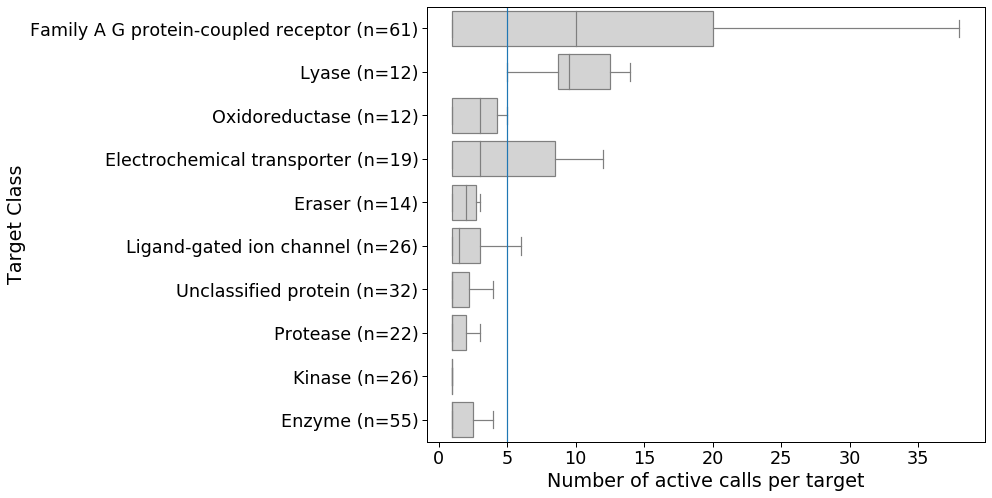

In [192]:
plt.figure(figsize=(10,8))
sns.set_context('paper', font_scale = 2)
ax = sns.boxplot(y='integrated_level_n', x='integrated_plasma_activity', data=actives_count.loc[actives_count['integrated_level_n'].isin(biggest_10_classes)], color='lightgrey', showfliers=False, order=median_order)
ax.set_ylabel('Target Class')
ax.set_xlabel('Number of active calls per target')
plt.axvline(5)

plt.savefig(basedir + '/integration_bioact_plasma_conc/figures/nr_actives_boxplot_10largetsTCs_unbound.png', dpi=100, bbox_inches='tight')


### Do pchembl values differ by target class? 

In [84]:
bioact_medians = pd.read_csv(basedir + '/bioactivities/results/bioact_medians_ae_drugs.txt', sep='\t')

In [85]:
bioact_medians_tc = bioact_medians.merge(target_class, on='accession', how='left')

In [86]:
bioact_numeric = bioact_medians_tc.loc[bioact_medians_tc['summary']!='inactive']
bioact_numeric['summary'] = bioact_numeric['summary'].astype(float)

/scratch/ias41/envs/release/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
numeric_counts = bioact_numeric.groupby('integrated_level').count()

In [88]:
biggest_20_classes = list(numeric_counts.sort_values(by='parent_molregno', ascending=False).head(20).index)

In [89]:
medians_order = list(bioact_numeric.loc[bioact_numeric['integrated_level'].isin(biggest_20_classes)].groupby('integrated_level').median().sort_values(by='summary', ascending=False).index)

In [90]:
bioact_numeric.loc[bioact_numeric['integrated_level'].isin(biggest_20_classes)].groupby('integrated_level').median()

,parent_molregno,summary
integrated_level,,
Cytochrome P450,88819,5.8950
Electrochemical transporter,48849,5.5525
Enzyme,73548,4.7500
Eraser,85029,4.6500
Family A G protein-coupled receptor,37266,6.2400
Hydrolase,36662,5.1300
Kinase,112655,5.9200
Ligand-gated ion channel,16654,6.1200
Lyase,67010,6.2200


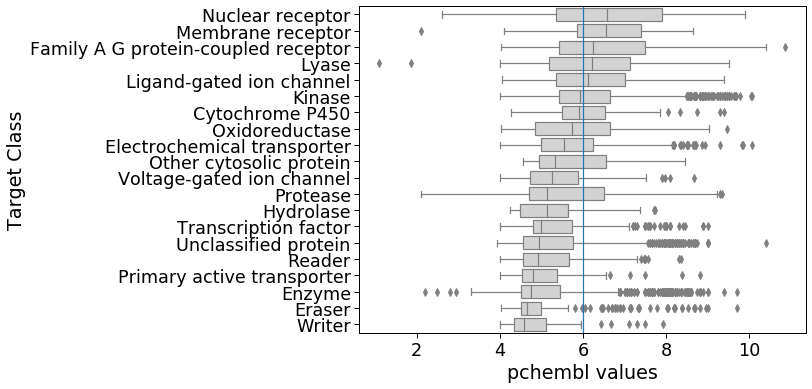

In [91]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale = 2)
ax = sns.boxplot(y='integrated_level', x='summary', data=bioact_numeric.loc[bioact_numeric['integrated_level'].isin(biggest_20_classes)], color='lightgrey', order=medians_order)
ax.set_ylabel('Target Class')
ax.set_xlabel('pchembl values')
plt.axvline(6)

#plt.savefig(basedir + '/integration_bioact_plasma_conc/figures/pchembl_boxplot_by_target_class.png', dpi=100, bbox_inches='tight')


### Is reduced dataset representative of complete in terms of target classes? (Peter discussion)

In [92]:
pchembl_all_tc = pchembl6.merge(target_class, on='accession', how='left')

In [93]:
pchembl_target_classes = pchembl_all_tc.groupby('integrated_level').count()[['accession']]
pchembl_target_classes['% datapoints'] = pchembl_target_classes['accession'].apply(lambda x: (x/sum(pchembl_target_classes['accession']))*100)

In [94]:
unbound_margin_target_classes = unbound_margin.merge(target_class, on='accession', how='left')

In [95]:
unbound_margin_target_classes = unbound_margin_target_classes.groupby('integrated_level').count()[['accession']]
unbound_margin_target_classes['% datapoints'] = unbound_margin_target_classes['accession'].apply(lambda x: (x/sum(unbound_margin_target_classes['accession']))*100)

In [96]:
compare_percentages = unbound_margin_target_classes[['% datapoints']].merge(pchembl_target_classes[['% datapoints']], on='integrated_level', suffixes = ['_unbound', '_pchembl'])

In [97]:
compare_percentages_selected = compare_percentages.loc[(compare_percentages['% datapoints_unbound']>1)&(compare_percentages['% datapoints_pchembl']>1)]
compare_percentages_selected.sort_values(by='% datapoints_pchembl', inplace=True)
compare_percentages_selected.rename(columns={'% datapoints_unbound': 'Subset with unbound plasma concentrations available', '% datapoints_pchembl': 'All bioactivities (drug-target pairs)'}, inplace=True)

/scratch/ias41/envs/release/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/scratch/ias41/envs/release/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


Text(0.5, 0, 'Drug-target pairs (%)')

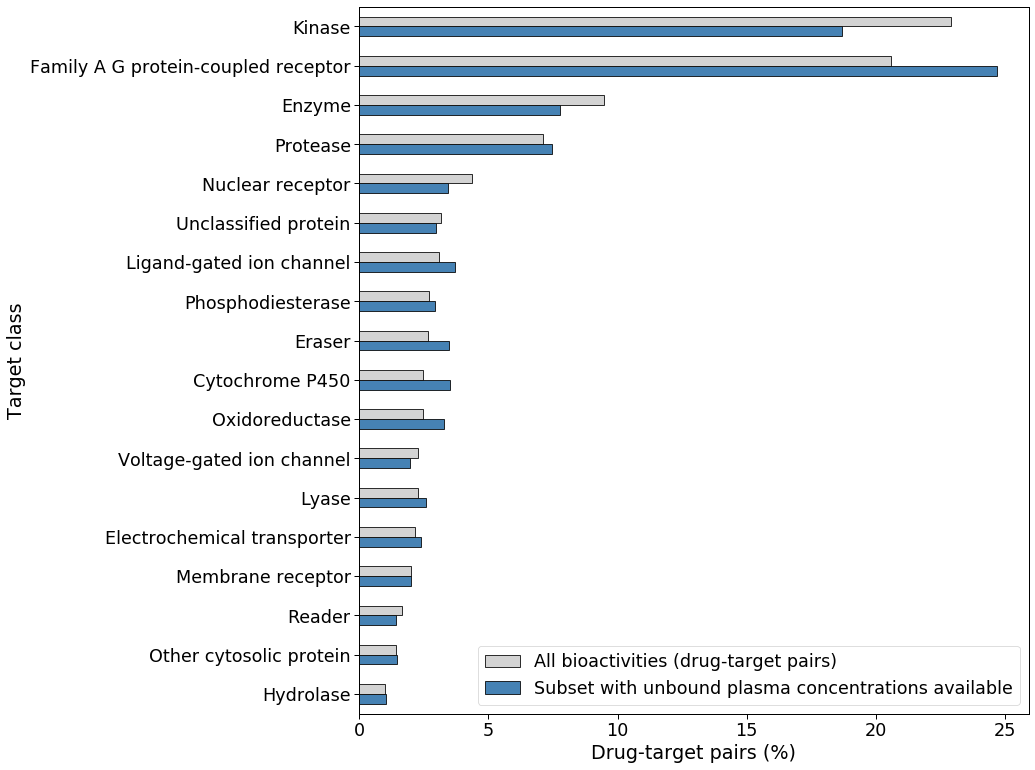

In [98]:
ax = compare_percentages_selected.reindex(compare_percentages_selected.index).plot(kind='barh', figsize=(12,13), color=['steelblue', 'lightgrey'], edgecolor='black')
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
ax.set_ylabel('Target class')
ax.set_xlabel('Drug-target pairs (%)')

#plt.savefig(basedir + '/integration_bioact_plasma_conc/figures/complete_vs_subset_unbound.png', dpi=100, bbox_inches='tight')


/scratch/ias41/envs/release/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Drug-target pairs (%)')

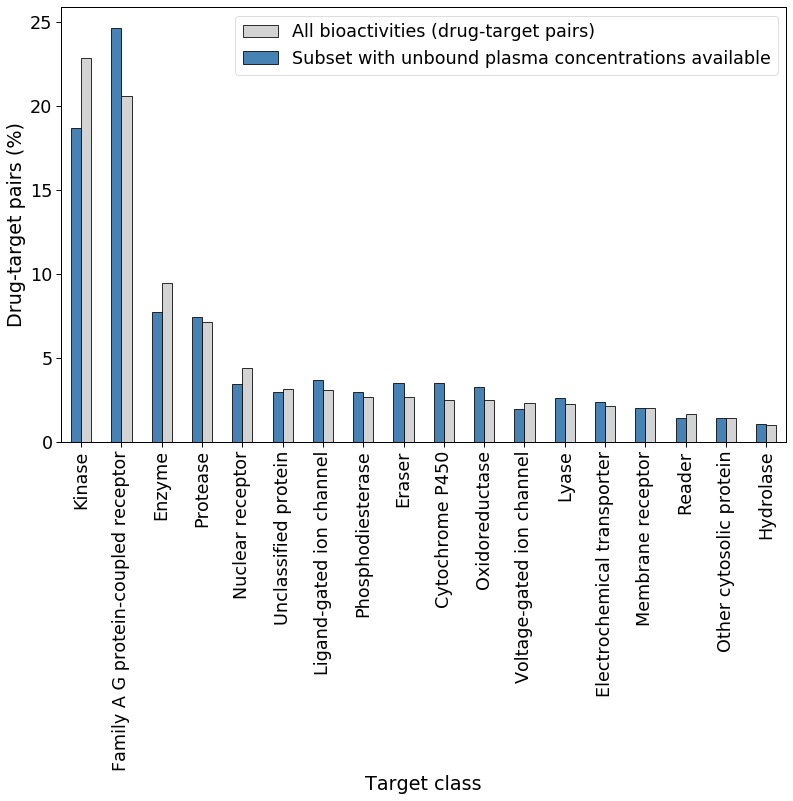

In [99]:

compare_percentages_selected.sort_values(by='All bioactivities (drug-target pairs)', ascending=False, inplace=True)
ax = compare_percentages_selected.reindex(compare_percentages_selected.index).plot(kind='bar', figsize=(13,8), color=['steelblue', 'lightgrey'], edgecolor='black')
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
ax.set_xlabel('Target class')
ax.set_ylabel('Drug-target pairs (%)')
#plt.savefig(basedir + '/integration_bioact_plasma_conc/figures/complete_vs_subset_unbound_horizontal.png', dpi=100, bbox_inches='tight')


### Bar plot of Unbound dataset % (upper bar) compared to changes (Peter discussion)

In [103]:
merged_unbound_changed = merged_unbound_margin.loc[merged_unbound_margin['integrated_plasma_activity_cutoff']!=merged_unbound_margin['integrated_plasma_activity_changed']]
merged_unbound_changed_tc = merged_unbound_changed.merge(target_class, on='accession', how='left')

In [104]:
merged_unbound_changed_by_activity = pd.DataFrame(merged_unbound_changed_tc.groupby(['integrated_level','integrated_plasma_activity_changed'])['accession'].count()).unstack()
merged_unbound_changed_by_activity.rename(columns={'accession': 'counts'}, inplace=True)
merged_unbound_changed_by_activity.fillna(0, inplace=True)

In [105]:
merged_unbound_changed_by_activity[('percentages',0.0)] = merged_unbound_changed_by_activity[('counts',0.0)].apply(lambda x: (x/(sum(merged_unbound_changed_by_activity[('counts',1.0)])+sum(merged_unbound_changed_by_activity[('counts',0.0)])))*100)
merged_unbound_changed_by_activity[('percentages',1.0)] = merged_unbound_changed_by_activity[('counts',1.0)].apply(lambda x: (x/(sum(merged_unbound_changed_by_activity[('counts',1.0)])+sum(merged_unbound_changed_by_activity[('counts',0.0)])))*100)

In [106]:
unbound_margin_all = unbound_margin.merge(target_class, on='accession', how='left')
unbound_margin_all_by_activity = pd.DataFrame(unbound_margin_all.groupby(['integrated_level','integrated_plasma_activity'])['accession'].count()).unstack()
unbound_margin_all_by_activity.rename(columns={'accession': 'counts'}, inplace=True)
unbound_margin_all_by_activity.fillna(0, inplace=True)

In [107]:
unbound_margin_all_by_activity[('percentages',0.0)] = unbound_margin_all_by_activity[('counts',0.0)].apply(lambda x: (x/(sum(unbound_margin_all_by_activity[('counts',1.0)])+sum(unbound_margin_all_by_activity[('counts',0.0)])))*100)
unbound_margin_all_by_activity[('percentages',1.0)] = unbound_margin_all_by_activity[('counts',1.0)].apply(lambda x: (x/(sum(unbound_margin_all_by_activity[('counts',1.0)])+sum(unbound_margin_all_by_activity[('counts',0.0)])))*100)

In [108]:
merged_unbound_changed_by_activity.index.name = 'Target class'
unbound_margin_all_by_activity.index.name = 'Target class'

In [120]:
merged_unbound_changed_by_activity

counts        percentages           
integrated_plasma_activity_changed     0.0    1.0         0.0        1.0
Target class                                                            
Cytochrome P450                       18.0    8.0    1.875000   0.833333
Electrochemical transporter           21.0   55.0    2.187500   5.729167
Enzyme                                12.0  148.0    1.250000  15.416667
Eraser                                 1.0   27.0    0.104167   2.812500
Family A G protein-coupled receptor  157.0   91.0   16.354167   9.479167
Family C G protein-coupled receptor    0.0    2.0    0.000000   0.208333
Hydrolase                              3.0   10.0    0.312500   1.041667
Isomerase                              3.0    0.0    0.312500   0.000000
Kinase                                 8.0   31.0    0.833333   3.229167
Ligand-gated ion channel               3.0   15.0    0.312500   1.562500
Lyase                                  0.0   39.0    0.000000   4.062500
Membrane receptor                      6.0    7.0    0.625000   0.729167
Nuclear receptor                       8.0    9.0    0.833333   0.937500
Other cytosolic protein                3.0    7.0    0.312500   0.729167
Oxidoreductase                         2.0   21.0    0.208333   2.187500
Phosphatase                            0.0    1.0    0.000000   0.104167
Phosphodiesterase                      1.0    1.0    0.104167   0.104167
Primary active transporter             4.0    8.0    0.416667   0.833333
Protease                               0.0   15.0    0.000000   1.562500
Reader                                 3.0   35.0    0.312500   3.645833
Secreted protein                       1.0    2.0    0.104167   0.208333
Transcription factor                   8.0   16.0    0.833333   1.666667
Transferase                            0.0    2.0    0.000000   0.208333
Transporter                            3.0    2.0    0.312500   0.208333
Unclassified protein                  22.0   70.0    2.291667   7.291667
Voltage-gated ion channel             15.0   27.0    1.562500   2.812500
Writer                                 0.0    9.0    0.000000   0.937500

In [123]:
unbound_margin_all_by_activity

counts         \
integrated_plasma_activity                              0.0    1.0   
Target class                                                         
Calcium channel auxiliary subunit alpha2delta f...    483.0    1.0   
Cytochrome P450                                      7017.0   42.0   
Electrochemical transporter                          4690.0  124.0   
Enzyme                                              15415.0  244.0   
Eraser                                               6959.0   60.0   
Family A G protein-coupled receptor                 49085.0  697.0   
Family B G protein-coupled receptor                  1147.0    0.0   
Family C G protein-coupled receptor                   624.0    2.0   
Hydrolase                                            2116.0   21.0   
Isomerase                                            1250.0    1.0   
Kinase                                              37635.0   60.0   
Ligand-gated ion channel                             7427.0   66.0   
Lyase                                                5106.0  120.0   
Membrane receptor                                    3992.0   30.0   
Nuclear receptor                                     6917.0   29.0   
Other cytosolic protein                              2900.0   23.0   
Other ion channel                                       1.0    0.0   
Other membrane protein                                 11.0    0.0   
Oxidoreductase                                       6583.0   47.0   
Phosphatase                                          1147.0    2.0   
Phosphodiesterase                                    5934.0    8.0   
Primary active transporter                            787.0   11.0   
Protease                                            14981.0   39.0   
Reader                                               2776.0   77.0   
Secreted protein                                      192.0    7.0   
Structural protein                                    274.0    2.0   
Toll-like and Il-1 receptors                          361.0    0.0   
Transcription factor                                  410.0   31.0   
Transferase                                          1597.0    6.0   
Transmembrane 1-electron transfer carriers            491.0    3.0   
Transporter                                            21.0    2.0   
Unclassified protein                                 5791.0  182.0   
Voltage-gated ion channel                            3942.0   43.0   
Writer                                               1685.0   23.0   

                                                   percentages            
integrated_plasma_activity                                 0.0       1.0  
Target class                                                              
Calcium channel auxiliary subunit alpha2delta f...    0.239405  0.000496  
Cytochrome P450                                       3.478067  0.020818  
Electrochemical transporter                           2.324659  0.061462  
Enzyme                                                7.640644  0.120942  
Eraser                                                3.449318  0.029740  
Family A G protein-coupled receptor                  24.329616  0.345477  
Family B G protein-coupled receptor                   0.568525  0.000000  
Family C G protein-coupled receptor                   0.309294  0.000991  
Hydrolase                                             1.048823  0.010409  
Isomerase                                             0.619579  0.000496  
Kinase                                               18.654275  0.029740  
Ligand-gated ion channel                              3.681289  0.032714  
Lyase                                                 2.530855  0.059480  
Membrane receptor                                     1.978686  0.014870  
Nuclear receptor                                      3.428501  0.014374  
Other cytosolic protein                               1.437423  0.011400  
Other ion channel                    

In [109]:
combined_percentages = unbound_margin_all_by_activity['percentages'].merge(merged_unbound_changed_by_activity['percentages'], on='Target class', how='outer', suffixes=['_unbound_all', '_changed'])
combined_percentages.fillna(0, inplace=True)
combined_percentages['cumulative'] = combined_percentages['1.0_unbound_all'] + combined_percentages['0.0_unbound_all']

In [110]:
combined_percentages_selected = combined_percentages.loc[combined_percentages['cumulative']>1].sort_values(by='cumulative')

In [111]:
combined_percentages_selected.columns

Index(['0.0_unbound_all', '1.0_unbound_all', '0.0_changed', '1.0_changed',
       'cumulative'],
      dtype='object')

In [112]:
pchembl_active = combined_percentages_selected['1.0_unbound_all']
pchembl_inactive = combined_percentages_selected['0.0_unbound_all']
unbound_active = combined_percentages_selected['1.0_changed']
unbound_inactive = combined_percentages_selected['0.0_changed']

In [114]:
N = len(combined_percentages_selected.index)
ind = np.arange(N) 
width = 0.3

Text(0, 0.5, 'Target class')

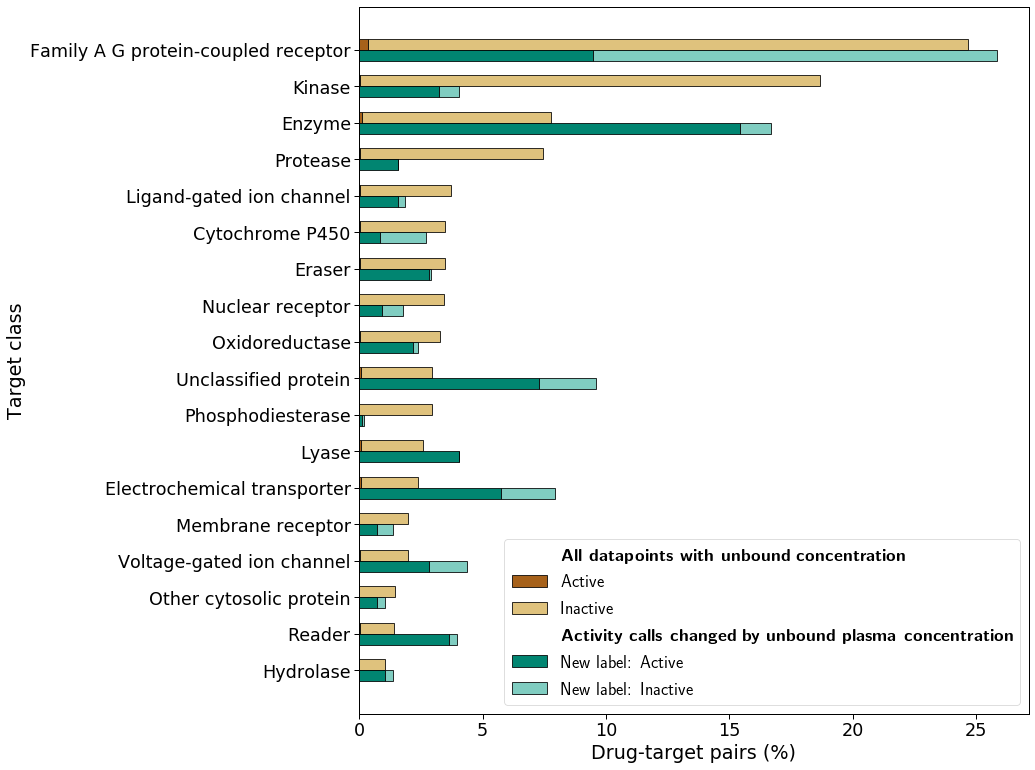

In [115]:
plt.figure(figsize=(12,13))
p1 = plt.barh(ind + width/2, pchembl_active, width, color='#a6611a', edgecolor='black')
p2 = plt.barh(ind + width/2, pchembl_inactive, width, color='#dfc27d', left=pchembl_active, edgecolor='black')

p3 = plt.barh(ind - width/2, unbound_active, width, color='#018571',edgecolor='black')
p4 = plt.barh(ind - width/2, unbound_inactive, width, color='#80cdc1', left=unbound_active, edgecolor='black')

plt.yticks(ind, combined_percentages_selected.index)

title_proxy = plt.Rectangle((0,0), 0, 0, color='w')

rc('text', usetex=True)
plt.legend([title_proxy, p1,p2, title_proxy, p3,p4], 
           [r"\textbf{All datapoints with unbound concentration}", "Active", "Inactive",r"\textbf{Activity calls changed by unbound plasma concentration}", "New label: Active","New label: Inactive"])
rc('text', usetex=False)

plt.xlabel('Drug-target pairs (%)')
plt.ylabel('Target class')

#plt.savefig(basedir + '/integration_bioact_plasma_conc/figures/all_unbound_vs_changed_stacked.png', dpi=100, bbox_inches='tight')



### I want to quantify how set of actives was affected

In [124]:
# Change in active datapoints

In [125]:
pchembl6.columns

Index(['accession', 'parent_molregno', 'integrated_plasma_activity',
       'predicted'],
      dtype='object')

In [126]:
merged_unbound_margin.columns

Index(['parent_molregno', 'pref_name', 'accession',
       'integrated_plasma_activity_cutoff',
       'integrated_plasma_activity_changed'],
      dtype='object')

In [127]:
# % of unbound fraction of active datapoints
(len(merged_unbound_margin.loc[merged_unbound_margin['integrated_plasma_activity_cutoff']==1.0]) / len(merged_unbound_margin)) * 100

0.9672098370488854

In [128]:
# % of unbound fraction of active datapoints
(len(merged_unbound_margin.loc[merged_unbound_margin['integrated_plasma_activity_changed']==1.0]) / len(merged_unbound_margin)) * 100

1.1852694191742477

In [129]:
# % of pchembl active datapoints
(len(pchembl6.loc[pchembl6['integrated_plasma_activity']==1.0]) / len(pchembl6)) * 100

1.3028558893577906

In [130]:
# Change in set of actives

In [131]:
merged_unbound_margin.head()

,parent_molregno,pref_name,accession,integrated_plasma_activity_cutoff,integrated_plasma_activity_changed
0,97,PRAZOSIN,B2RXH2,0.0,0.0
1,97,PRAZOSIN,O15118,0.0,0.0
2,97,PRAZOSIN,O15244,0.0,0.0
3,97,PRAZOSIN,O15245,0.0,0.0
4,97,PRAZOSIN,O75496,0.0,0.0


In [132]:
merged_unbound_margin_cutoff_actives = merged_unbound_margin.loc[merged_unbound_margin['integrated_plasma_activity_cutoff']==1]
merged_unbound_margin_plasma_actives = merged_unbound_margin.loc[merged_unbound_margin['integrated_plasma_activity_changed']==1]

In [133]:
cutoff_active_pairs = [(x,y) for x, y in zip(merged_unbound_margin_cutoff_actives['accession'], merged_unbound_margin_cutoff_actives['parent_molregno'])] 
plasma_active_pairs = [(x,y) for x, y in zip(merged_unbound_margin_plasma_actives['accession'], merged_unbound_margin_plasma_actives['parent_molregno'])] 

In [134]:
len(cutoff_active_pairs), len(plasma_active_pairs)

(1548, 1897)

In [135]:
len(set(cutoff_active_pairs) & set(plasma_active_pairs))

1250

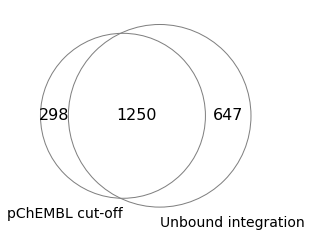

In [136]:
fig, ax = plt.subplots()
v = venn2(subsets = ((1548-1250),(1897-1250),1250), set_labels=["pChEMBL cut-off", "Unbound integration"])
v.get_patch_by_id('100').set_color('white')
v.get_patch_by_id('010').set_color('white')
c=venn2_circles(subsets = ((1548-1250),(1897-1250),1250), linewidth=1, color="grey")
v.get_patch_by_id('11').set_color('white')
for text in v.set_labels:
    text.set_fontsize(14)
for text in v.subset_labels:
    text.set_fontsize(16)
fig.savefig(basedir + '/integration_bioact_plasma_conc/figures/venn_active_set.png', dpi=100, bbox_inches='tight')


### Overall dataset counts for next analysis?

Find nr of drug-target pairs in FAERS and SIDER datasets

In [137]:
# AE datasets

# FAERS
with open(basedir + '/faers_aes/results/20200108_PSM_molregno2aes_PRR2_chi4_faers_min5drugs_all_random_controls.pkl', 'rb') as f:
    molregno2aes_faers_all = pickle.load(f)

# SIDER
with open(basedir + '/sider/results/20191215_molregno2aes_sider_min5drugs.pkl', 'rb') as f:
    molregno2aes_sider_all = pickle.load(f)

In [138]:
# Find compounds with no significantly associated AEs
no_info_molregnos = [molregno for molregno in molregno2aes_faers_all if len(molregno2aes_faers_all[molregno])==0]
nr_compounds_without_aes = len(no_info_molregnos)
# Restrict to drugs with at least one AE
molregno2aes_faers = molregno2aes_faers_all.copy()
for molregno in no_info_molregnos:
    del(molregno2aes[molregno])
assert nr_compounds_without_aes == len(molregno2aes_faers_all) - len(molregno2aes_faers)

In [139]:
# Find compounds with no significantly associated AEs
no_info_molregnos = [molregno for molregno in molregno2aes_sider_all if len(molregno2aes_sider_all[molregno])==0]
nr_compounds_without_aes = len(no_info_molregnos)
# Restrict to drugs with at least one AE
molregno2aes_sider = molregno2aes_sider_all.copy()
for molregno in no_info_molregnos:
    del(molregno2aes[molregno])
assert nr_compounds_without_aes == len(molregno2aes_sider_all) - len(molregno2aes_sider)

In [141]:
# Load datafiles which - restricted to min_n
pchembl6_min5 = pd.read_csv(basedir + '/integration_bioact_plasma_conc/results/pchembl6_tp_cutoff_median_min5active.txt', sep='\t')
unbound_margin_min5 = pd.read_csv(basedir + '/integration_bioact_plasma_conc/results/unbound_median_margin_min5active_added_preds_measured_proteins.txt', sep='\t')


In [142]:
# Restrict bioactivity to dataset to those compounds in the current dataset (sider/faers) and at least one AE
bioact_df_unbound_sider = unbound_margin_min5.loc[unbound_margin_min5['parent_molregno'].isin(molregno2aes_sider.keys()),:]

In [143]:
len(bioact_df_unbound_sider), len(bioact_df_unbound_sider[['parent_molregno', 'accession']].drop_duplicates())

(27063, 27063)

In [144]:
len(bioact_df_unbound_sider['parent_molregno'].drop_duplicates())

873

In [145]:
len(bioact_df_unbound_sider['accession'].drop_duplicates())

104

In [146]:
bioact_df_unbound_faers = unbound_margin_min5.loc[unbound_margin_min5['parent_molregno'].isin(molregno2aes_faers.keys()),:]

In [147]:
len(bioact_df_unbound_sider), len(bioact_df_unbound_faers)

(27063, 34247)

In [148]:
len(bioact_df_unbound_faers), len(bioact_df_unbound_faers[['parent_molregno', 'accession']])

(34247, 34247)

In [149]:
# Restrict bioactivity to dataset to those compounds in the current dataset (sider/faers) and at least one AE
bioact_df_pchembl_sider = pchembl6_min5.loc[pchembl6_min5['parent_molregno'].isin(molregno2aes_sider.keys()),:]

In [150]:
len(bioact_df_pchembl_sider), len(bioact_df_pchembl_sider[['parent_molregno', 'accession']])

(70953, 70953)

In [151]:
len(bioact_df_pchembl_sider['accession'].drop_duplicates())

234

In [152]:
len(bioact_df_pchembl_sider['parent_molregno'].drop_duplicates())

1001

In [153]:
# Restrict bioactivity to dataset to those compounds in the current dataset (sider/faers) and at least one AE
bioact_df_pchembl_faers = pchembl6_min5.loc[pchembl6_min5['parent_molregno'].isin(molregno2aes_faers.keys()),:]

In [154]:
len(bioact_df_pchembl_faers), len(bioact_df_pchembl_faers[['parent_molregno', 'accession']])

(85155, 85155)

In [155]:
len(bioact_df_pchembl_faers['accession'].drop_duplicates())

234

In [156]:
len(bioact_df_pchembl_faers['parent_molregno'].drop_duplicates())

1173

### Target class bar plots at this stage? - % of drug target pairs

In [157]:
# compare bioact_df_unbound_faers and bioact_df_unbound_sider

In [179]:
bioact_df_unbound_faers_tc = bioact_df_unbound_faers.merge(target_class, on='accession', how='left')
bioact_df_unbound_faers_grouped = bioact_df_unbound_faers_tc.groupby('integrated_level').count()[['accession']]
bioact_df_unbound_faers_grouped['% datapoints'] = bioact_df_unbound_faers_grouped['accession'].apply(lambda x: (x/sum(bioact_df_unbound_faers_grouped['accession']))*100)

In [180]:
bioact_df_unbound_sider_tc = bioact_df_unbound_sider.merge(target_class, on='accession', how='left')
bioact_df_unbound_sider_grouped = bioact_df_unbound_sider_tc.groupby('integrated_level').count()[['accession']]
bioact_df_unbound_sider_grouped['% datapoints'] = bioact_df_unbound_sider_grouped['accession'].apply(lambda x: (x/sum(bioact_df_unbound_sider_grouped['accession']))*100)

In [181]:
compare_percentages_classes_unbound = bioact_df_unbound_sider_grouped[['% datapoints']].merge(bioact_df_unbound_faers_grouped[['% datapoints']], on='integrated_level', suffixes = ['_sider', '_faers'])
compare_percentages_classes_unbound = compare_percentages_classes_unbound.loc[(compare_percentages_classes_unbound['% datapoints_faers']>1)&(compare_percentages_classes_unbound['% datapoints_sider']>1)]
compare_percentages_classes_unbound.sort_values(by='% datapoints_sider', inplace=True)
compare_percentages_classes_unbound.rename(columns={'% datapoints_sider': 'SIDER','% datapoints_faers': 'FAERS'}, inplace=True)

In [182]:
compare_percentages_classes_unbound

,SIDER,FAERS
integrated_level,,
Nuclear receptor,1.133606,1.200549
Eraser,1.162580,1.231992
Unclassified protein,1.187932,1.263435
Writer,1.564594,1.589298
Membrane receptor,1.821738,1.800823
Reader,2.133208,2.258175
Voltage-gated ion channel,2.611278,2.715527
Ligand-gated ion channel,2.629387,2.755545
Enzyme,3.161783,3.301509


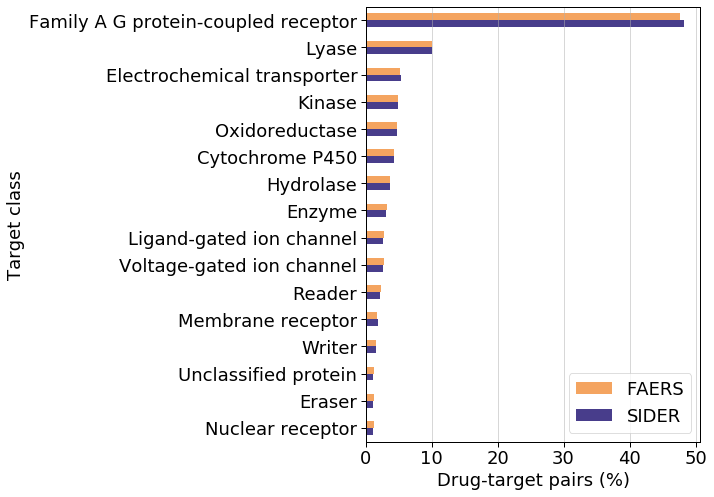

In [183]:
ax5 = compare_percentages_classes_unbound.reindex(compare_percentages_classes_unbound.index).plot(kind='barh', figsize=(6,8), color=['darkslateblue', 'sandybrown'],fontsize=18)
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=18, loc=4)
ax5.set_ylabel('Target class', fontsize=18)
ax5.set_xlabel('Drug-target pairs (%)', fontsize=18)
ax5.xaxis.grid(True, which='major', linestyle='-', linewidth=0.5)

#plt.savefig(basedir + '/integration_bioact_plasma_conc/figures/target_classes_FvS_unbound.png', dpi=100, bbox_inches='tight')


[Text(0, 0, 'Family A G protein-coupled receptor'),
 Text(0, 0, 'Lyase'),
 Text(0, 0, 'Electrochemical transporter'),
 Text(0, 0, 'Kinase'),
 Text(0, 0, 'Oxidoreductase'),
 Text(0, 0, 'Cytochrome P450'),
 Text(0, 0, 'Hydrolase'),
 Text(0, 0, 'Enzyme'),
 Text(0, 0, 'Ligand-gated ion channel'),
 Text(0, 0, 'Voltage-gated ion channel'),
 Text(0, 0, 'Reader'),
 Text(0, 0, 'Membrane receptor'),
 Text(0, 0, 'Writer'),
 Text(0, 0, 'Unclassified protein'),
 Text(0, 0, 'Eraser'),
 Text(0, 0, 'Nuclear receptor')]

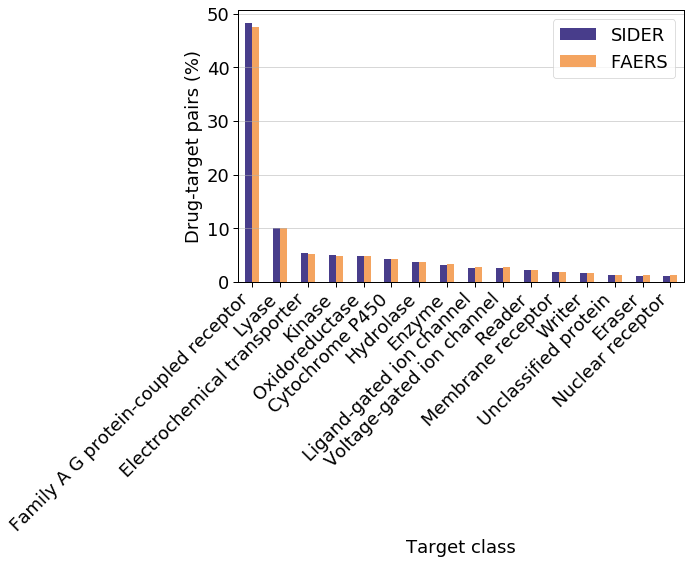

In [192]:
compare_percentages_classes_unbound.sort_values(by='FAERS', inplace=True, ascending=False)

ax5 = compare_percentages_classes_unbound.reindex(compare_percentages_classes_unbound.index).plot(kind='bar', figsize=(8,5), color=['darkslateblue', 'sandybrown'],fontsize=18)
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=18, loc=1)
ax5.set_xlabel('Target class', fontsize=18)
ax5.set_ylabel('Drug-target pairs (%)', fontsize=18)
ax5.yaxis.grid(True, which='major', linestyle='-', linewidth=0.5)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, horizontalalignment='right')

#plt.savefig(basedir + '/integration_bioact_plasma_conc/figures/target_classes_FvS_unbound.png', dpi=100, bbox_inches='tight')


In [174]:
# compare bioact_df_pchembl_faers and bioact_df_pchembl_sider

In [193]:
bioact_df_pchembl_faers_tc = bioact_df_pchembl_faers.merge(target_class, on='accession', how='left')
bioact_df_pchembl_faers_grouped = bioact_df_pchembl_faers_tc.groupby('integrated_level').count()[['accession']]
bioact_df_pchembl_faers_grouped['% datapoints'] = bioact_df_pchembl_faers_grouped['accession'].apply(lambda x: (x/sum(bioact_df_pchembl_faers_grouped['accession']))*100)

In [194]:
bioact_df_pchembl_sider_tc = bioact_df_pchembl_sider.merge(target_class, on='accession', how='left')
bioact_df_pchembl_sider_grouped = bioact_df_pchembl_sider_tc.groupby('integrated_level').count()[['accession']]
bioact_df_pchembl_sider_grouped['% datapoints'] = bioact_df_pchembl_sider_grouped['accession'].apply(lambda x: (x/sum(bioact_df_pchembl_sider_grouped['accession']))*100)

In [195]:
compare_percentages_classes_pchembl = bioact_df_pchembl_sider_grouped[['% datapoints']].merge(bioact_df_pchembl_faers_grouped[['% datapoints']], on='integrated_level', suffixes = ['_sider', '_faers'])
compare_percentages_classes_pchembl = compare_percentages_classes_pchembl.loc[(compare_percentages_classes_pchembl['% datapoints_sider']>1)&(compare_percentages_classes_pchembl['% datapoints_faers']>1)]
compare_percentages_classes_pchembl.sort_values(by='% datapoints_faers', inplace=True)
compare_percentages_classes_pchembl.rename(columns={'% datapoints_faers': 'FAERS', '% datapoints_sider': 'SIDER'}, inplace=True)

In [196]:
compare_percentages_classes_pchembl

,SIDER,FAERS
integrated_level,,
Membrane receptor,1.392447,1.374778
Hydrolase,1.875627,1.835747
Voltage-gated ion channel,1.902083,1.932120
Electrochemical transporter,2.615016,2.676405
Eraser,2.868442,2.769295
Protease,3.163640,3.095573
Enzyme,3.992147,3.951325
Ligand-gated ion channel,4.171772,4.118528
Cytochrome P450,4.465579,4.714188


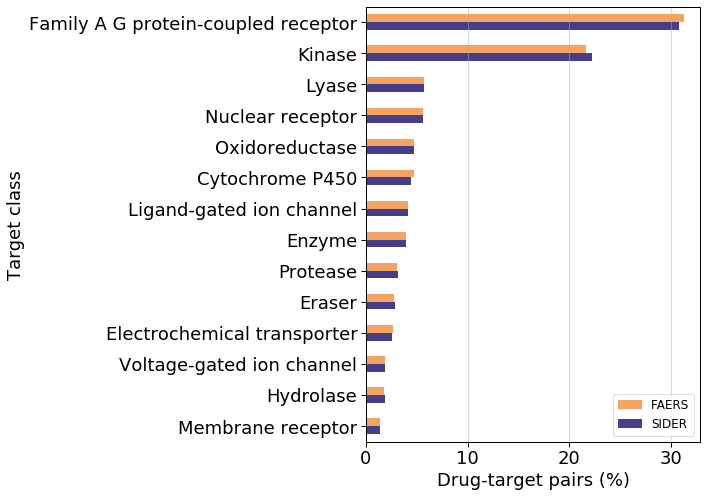

In [197]:
ax6 = compare_percentages_classes_pchembl.reindex(compare_percentages_classes_pchembl.index).plot(kind='barh', figsize=(6,8), color=['darkslateblue','sandybrown'], fontsize=18)
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=12)
ax6.set_ylabel('Target class', fontsize=18)
ax6.set_xlabel('Drug-target pairs (%)', fontsize=18)
ax6.xaxis.grid(True, which='major', linestyle='-', linewidth=0.5)

#plt.savefig(basedir + '/integration_bioact_plasma_conc/figures/target_classes_FvS_pchembl.png', dpi=100, bbox_inches='tight')


In [198]:
compare_percentages_classes_unbound.sort_values(by='FAERS', inplace=True, ascending=False)
compare_percentages_classes_pchembl.sort_values(by='FAERS', inplace=True, ascending=False)


In [260]:
len(compare_percentages_classes_unbound)

16

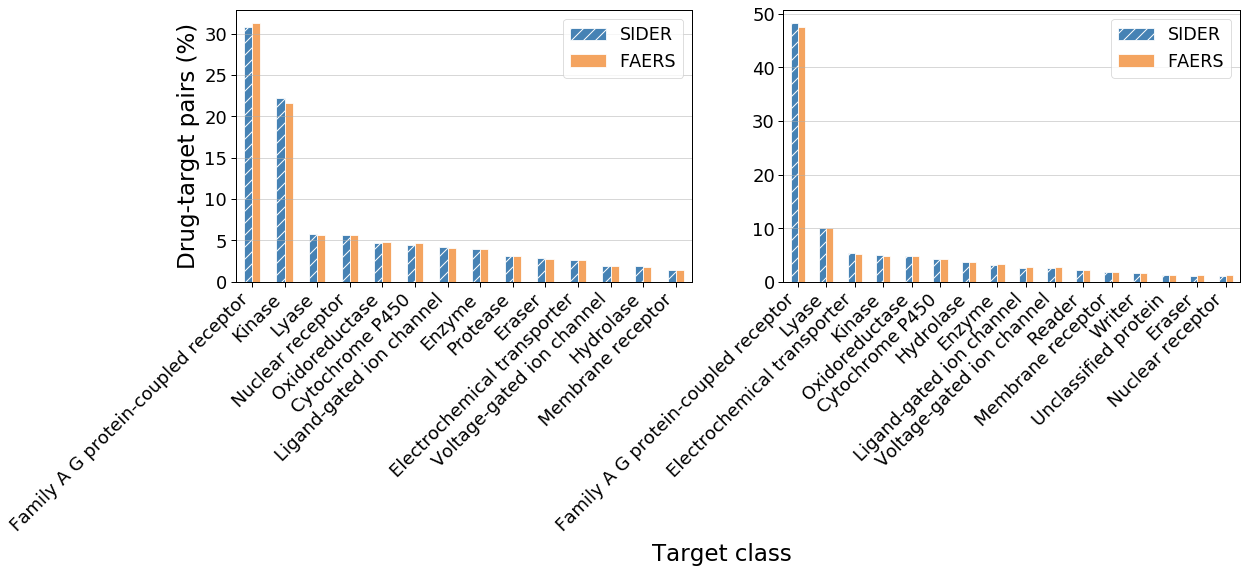

In [299]:
f, (ax6, ax5) = plt.subplots(1,2, figsize=(18,5), gridspec_kw={'width_ratios': [1,1], 'height_ratios': [1]})


compare_percentages_classes_unbound.reindex(compare_percentages_classes_unbound.index).plot(kind='bar', color=['steelblue', 'sandybrown'],fontsize=18, ax=ax5, edgecolor='white')

#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=18, loc=1)
ax5.set_xlabel('', fontsize=18)
#ax5.set_ylabel('Drug-target pairs (%)', fontsize=18)
ax5.yaxis.grid(True, which='major', linestyle='-', linewidth=0.5)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, horizontalalignment='right')
#ax5.legend_.remove()
#ax5.set_title('Plasma concentration integration', ha='center')

bars = ax5.patches
patterns =('//', '')
hatches = [p for p in patterns for i in range(len(compare_percentages_classes_unbound))]
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1]

ax5.legend()

compare_percentages_classes_pchembl.reindex(compare_percentages_classes_pchembl.index).plot(kind='bar', color=['steelblue', 'sandybrown'],fontsize=18, ax=ax6, edgecolor='white')
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=18, loc=1)
ax6.set_xlabel('', fontsize=18)
ax6.set_ylabel('Drug-target pairs (%)', fontsize=23)
ax6.yaxis.grid(True, which='major', linestyle='-', linewidth=0.5)
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45, horizontalalignment='right')

bars = ax6.patches
patterns =('//', '')
hatches = [p for p in patterns for i in range(len(compare_percentages_classes_pchembl))]
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
#ax6.legend(bbox_to_anchor=(1.325,1.2), ncol=2)
#ax6.set_title('pChEMBL cut-off', ha='center')

ax6.legend()

f.text(0.5, -0.65, 'Target class', ha='center', fontsize=23)

plt.savefig(basedir + '/integration_bioact_plasma_conc/figures/target_classes_FvS_unbound_twin.png', dpi=100, bbox_inches='tight')
